# Содиков Фарход, ПИ19-1
# Linear Regression

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

## Task №1. Using the Numpy library.


    Dots: [5.1 6.2 7.3 8.4]



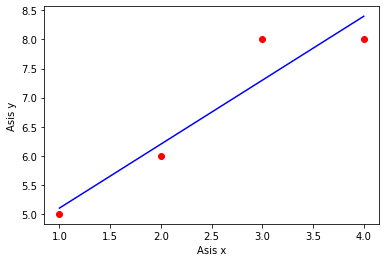


    a: 1.1
    b: 4.0



In [46]:
def a_coef_b(x, y):
    xAvg = np.mean(x)
    yAvg = np.mean(y)
    x_y = np.sum((x - xAvg) * (y - yAvg))
    x_x = np.sum(x * x - 2 * x * xAvg + xAvg * xAvg)
    a = x_y / x_x
    b = yAvg - a * xAvg
    return(b, a)
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 8, 8])

dots = a_coef_b(x, y)
plt.scatter(x, y, color = 'red')
d_y = dots[0] + dots[1] * x
print(f'''
    Dots: {d_y}
''')
plt.plot(x, d_y, color = 'blue') 
plt.xlabel('Asis x')
plt.ylabel('Asis y')
plt.show()
print(f'''
    a: {a_coef_b(x, y)[1]}
    b: {a_coef_b(x, y)[0]}
''')

## Task №1. Using the Scikit-learn library.

In [53]:
x = np.array([1, 2, 3, 4]).reshape((-1, 1))
y = np.array([5, 6, 8, 8])

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
model2 = LinearRegression().fit(x, y.reshape((-1, 1)))
score = model.score(x, y)
pred = model.predict(x)
print(f'''
Slope №1: {model.coef_}
Intercept №1: {model.intercept_}
Slope №2: {model2.coef_}
Intercept №2: {model2.intercept_}
Coef of determination: {score}
Predict: {pred}
''')

yPlt = model.predict(x)
xPlt = np.arange(5).reshape((-1, 1))

print(f'''
    {yPlt}
{xPlt}
''')


Slope №1: [1.1]
Intercept №1: 3.999999999999999
Slope №2: [[1.1]]
Intercept №2: [4.]
Coef of determination: 0.8962962962962963
Predict: [5.1 6.2 7.3 8.4]


    [5.1 6.2 7.3 8.4]
[[0]
 [1]
 [2]
 [3]
 [4]]



## Task №2. Price predicting using the Houses.csv dataset.

In [54]:
df = pd.read_csv('./data/Houses.csv', index_col = 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Какие признаки наиболее всего влияют, по Вашему мнению, на цену?

Больше всего вBathrooms. Также: bedrooms, sqft_living, yr_built и waterfront.

### Возможно ли уменьшить количество признаков?

Да. Решение:

In [55]:
df_n = df.copy()
df_n.drop(columns = ['id', 'date', 'zipcode', 'lat', 'long'], inplace = True)
df_n.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


### Есть ли пропуски в данных?

In [56]:
print(f'''
{df.isna().sum()} 

Пропусков нет.
''')


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64 

Пропусков нет.



### Можно ли обойтись одним параметром? Выберите один и решите задачу.

Да. Цена за квадратный метр. Пример:

In [62]:
x = df_n.sqft_lot
x = x.to_numpy().reshape((-1, 1))
y = df.price
model = LinearRegression().fit(x, y)
print(f'''
    Intercept: {model.intercept_}
    Slope: {model.coef_[0]}
    f(x) = {model.intercept_} +  {model.coef_[0]} * x = {model.intercept_ * model.coef_[0]} * x
''')


    Intercept: 528082.6128022488
    Slope: 0.7947014456723956
    f(x) = 528082.6128022488 +  0.7947014456723956 * x = 419668.01582840306 * x



In [58]:
print(f'''
    250 m^2: {np.round(model.predict([[250]])[0], decimals = 1)}
    550 m^2: {np.round(model.predict([[550]])[0], decimals = 1)}
    800 m^2: {np.round(model.predict([[800]])[0], decimals = 1)}
    1050 m^2: {np.round(model.predict([[1050]])[0], decimals = 1)}
    1350 m^2: {np.round(model.predict([[1350]])[0], decimals = 1)}
    1700 m^2: {np.round(model.predict([[1700]])[0], decimals = 1)}
''')


    250 m^2: 528281.3
    550 m^2: 528519.7
    800 m^2: 528718.4
    1050 m^2: 528917.0
    1350 m^2: 529155.5
    1700 m^2: 529433.6



### Оставьте несколько параметров и решите задачу многомерной регрессии.

In [59]:
df_n2 = df.copy()
df_n2 = df_n2[['price', 'bedrooms', 'bathrooms', 'sqft_lot']]
df_n2.head()

,price,bedrooms,bathrooms,sqft_lot
0,221900.0,3,1.00,5650
1,538000.0,3,2.25,7242
2,180000.0,2,1.00,10000
3,604000.0,4,3.00,5000
4,510000.0,3,2.00,8080


In [60]:
x = df_n2[['bedrooms', 'bathrooms', 'sqft_lot']].to_numpy()
y = df_n2.price

In [61]:
model = LinearRegression().fit(x, y)
print(f'''
    Predict: {model.predict([[3, 2.00, 5000]])[0]}
''')


    Predict: 501451.5007507246



In [37]:
print(f'''
    Coef of determination = r^2 = {model.score(x, y)}
''')


    Coef of determination = r^2 = 0.27965565977126594

